In [ ]:
# Mounting my google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os

# TRAIN_PATH = os.path.join('Tensorflow', 'workspace', 'images', 'train')
# TEST_PATH = os.path.join('Tensorflow', 'workspace', 'images', 'test')
# VALID_PATH = os.path.join('Tensorflow', 'workspace', 'images', 'valid')
ARCHIVE_PATH = os.path.join('tensorflow', 'workspace', 'images', 'archive.tar.gz')

CUSTOM_MODEL_NAME = 'faster_rcnn_resnet50' 
# CUSTOM_MODEL_NAME = 'ssd_resnet50'
PRETRAINED_MODEL_NAME = 'faster_rcnn_resnet50_v1_640x640_coco17_tpu-8'
# PRETRAINED_MODEL_NAME = 'ssd_resnet50_v1_fpn_640x640_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz'
# PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz'
# TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
# LABEL_MAP_NAME = 'label_map.pbtxt'

paths = {
    'WORKSPACE_PATH': os.path.join('tensorflow', 'workspace'),
    'ANNOTATION_PATH': os.path.join('tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('tensorflow', 'workspace','models'),
    # 'PRETRAINED_MODEL_PATH': os.path.join('tensorflow', 'models', 'research', 'pretrained_model'),
    'PRETRAINED_MODEL_PATH': os.path.join('drive','MyDrive','pretrained_model'),
    'CHECKPOINT_PATH': os.path.join('tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    # 'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    # 'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    # 'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'),
 }

files = {
    # 'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    # 'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    # 'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [ ]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# Unzip images

In [ ]:
# importing the "tarfile" module
import tarfile
  
# open file
file = tarfile.open('tensorflow/workspace/images/archive_v4.tar.gz')
  
# extracting file
file.extractall('tensorflow/workspace/images')
  
file.close()

# Download TF2

In [ ]:
os.chdir('tensorflow')
os.getcwd()

In [ ]:
# Base model
!git clone https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 74854, done.
remote: Counting objects: 100% (342/342), done.
remote: Compressing objects: 100% (203/203), done.
remote: Total 74854 (delta 193), reused 257 (delta 134), pack-reused 74512
Receiving objects: 100% (74854/74854), 580.53 MiB | 18.88 MiB/s, done.
Resolving deltas: 100% (53087/53087), done.


In [ ]:
# Change with setup.py file from drive before the installation.

In [ ]:
os.chdir('./..')
os.getcwd()

'/content'

# Change setup.py file

In [ ]:
# Installing tensorflow
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

# Training folder & opencv

In [ ]:
os.chdir('tensorflow/models/research')
os.getcwd()

In [ ]:
# os.chdir('tensorflow/models/research')
model_dir = 'training/'
# Optionally remove content in output model directory to fresh start.
!rm -rf {model_dir}
os.makedirs(model_dir, exist_ok=True)

In [ ]:
!pip uninstall opencv-python -y
!pip install opencv-python

In [ ]:
# os.chdir('drive/MyDrive/pretrained_model')
os.getcwd()


'/content/drive/MyDrive/pretrained_model'

In [ ]:
import tensorflow as tf
import tensorboard.summary.v1 as tb_summary

pr_curve_summary = tb_summary.pr_curve(
    "pr", labels=tf.constant([True]), predictions=tf.constant([0.5]))

writer = tf.summary.create_file_writer("/pr")
with writer.as_default():
  tf.summary.experimental.write_raw_pb(pr_curve_summary, step=0)

# Evaluation

In [ ]:
!python /content/tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=/content/drive/MyDrive/pretrained_model --pipeline_config_path=/content/tensorflow/models/research/training/pipeline.config --checkpoint_dir=/content/drive/MyDrive/pretrained_model

# Training

In [ ]:
!python /content/tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=/content/drive/MyDrive/pretrained_model --pipeline_config_path=/content/tensorflow/models/research/training/pipeline.config --num_train_steps=250000 --checkpoint_every_n=2000

# Loading trained model from checkpoints

In [ ]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file('drive/MyDrive/pretrained_model/pipeline.config')
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join('drive/MyDrive/pretrained_model', 'ckpt-115')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# Detect from an image

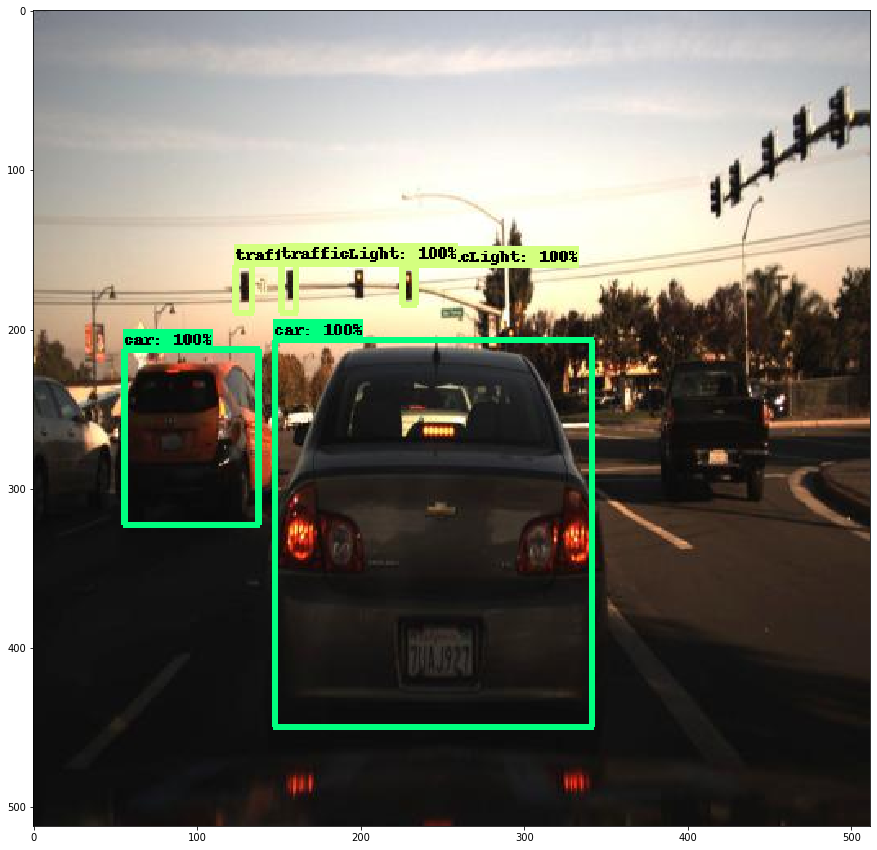

In [ ]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)

category_index = label_map_util.create_category_index_from_labelmap('tensorflow/workspace/annotations/label_map.pbtxt')
IMAGE_PATH = os.path.join('tensorflow/workspace/images', 'test', '1478732188478386086_jpg.rf.41212da954513d68e7b3bb9aa5ce0abd.jpg')
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.figure(figsize = (15,15))
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB), interpolation='nearest', aspect='auto')
plt.show()

In [ ]:
from google.colab.patches import cv2_imshow
cap = cv2.VideoCapture('tensorflow/workspace/images/traffic1.MTS')
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2_imshow(cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

In [ ]:
os.chdir('eval')
os.getcwd()

'/content/drive/MyDrive/pretrained_model/eval'

In [ ]:
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator

for e in summary_iterator('events.out.tfevents.1656340879.62c4148c1b4f.1046.0.v2'):
    for v in e.summary.value:
        if v.tag == 'loss' or v.tag == 'accuracy':
            print(v.simple_value)